## 1. Adım: Gerekli Kütüphaneleri İçe Aktarma
Öncelikle, gerekli kütüphaneleri içe aktaralım:

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Adım: Dizin İçindeki Klasörleri ve Dosya Sayılarını Kaydetme
Dizin içindeki klasörleri ve her bir klasördeki dosya sayılarını bir sözlük (dict) ile kaydedelim:

In [2]:
def klasor_ve_dosya_sayisi(dizin):
    veri = {}
    for klasor in os.listdir(dizin):
        klasor_yolu = os.path.join(dizin, klasor)
        if os.path.isdir(klasor_yolu):
            dosya_sayisi = len([f for f in os.listdir(klasor_yolu) if os.path.isfile(os.path.join(klasor_yolu, f))])
            veri[klasor] = dosya_sayisi
    return veri

ana_dizin = r"D:\Projeler\UniversiteProjeler\PlantMasterAI\PlantMaster_Veriler\BIRLESTIRILMIS\Veri Setleri\VeriSetiSınıflandırılmış_V2_224_NoAug"

veri = klasor_ve_dosya_sayisi(ana_dizin)

In [3]:
veri

{'AcıBiberHastalıkları_ChiliDisease-healthy': 100,
 'AcıBiberHastalıkları_ChiliDisease-leaf curl': 100,
 'AcıBiberHastalıkları_ChiliDisease-leaf spot': 100,
 'AcıBiberHastalıkları_ChiliDisease-whitefly': 100,
 'AcıBiberHastalıkları_ChiliDisease-yellowish': 100,
 'BalKabağıHastalıkları_PumpkinLeafDiseasesDataset-Bacterial Leaf Spot': 400,
 'BalKabağıHastalıkları_PumpkinLeafDiseasesDataset-Downy Mildew': 400,
 'BalKabağıHastalıkları_PumpkinLeafDiseasesDataset-Healthy Leaf': 400,
 'BalKabağıHastalıkları_PumpkinLeafDiseasesDataset-Mosaic Disease': 400,
 'BalKabağıHastalıkları_PumpkinLeafDiseasesDataset-Powdery_Mildew': 400,
 'BuğdayHastalıkları_WheatDisease-brown_rust': 915,
 'BuğdayHastalıkları_WheatDisease-healthy': 1225,
 'BuğdayHastalıkları_WheatDisease-septoria': 97,
 'BuğdayHastalıkları_WheatDisease-yellow_rust': 1132,
 'DolmalıkBiberHastalıkları_PepperBellDisease-bacterial_spot': 1067,
 'DolmalıkBiberHastalıkları_PepperBellDisease-healthy': 1538,
 'DomatesHastalıkları_TomatoDisease-

## 3. Grafik Verilerini Hazırlama
Renk paleti ve veri yapılarını oluşturma

In [4]:
# Veri ve renk listeleri
bar_verileri = []
bar_etiketleri = []
renkler = []
bitki_renkleri = {}

# Renk paleti (20 farklı renk)
renk_paleti = plt.cm.tab20.colors

# Bitki türlerine renk atama
for i, klasor_adi in enumerate(veri.keys()):
    bitki_adi = klasor_adi.split("_")[1].split("-")[0]
    if bitki_adi not in bitki_renkleri:
        bitki_renkleri[bitki_adi] = renk_paleti[i % len(renk_paleti)]

# Etiket ve verileri doldurma
for klasor_adi, dosya_sayisi in veri.items():
    ingilizce_ad = klasor_adi.split("_")[1].split("-")[0]
    hastalik_cesidi = klasor_adi.split("-")[1]
    bar_verileri.append(dosya_sayisi)
    bar_etiketleri.append(f"{ingilizce_ad}-{hastalik_cesidi}")
    renkler.append(bitki_renkleri[ingilizce_ad])

# 4. Grafik Çizimi
Yatay bar plot oluşturma ve özelleştirmeler

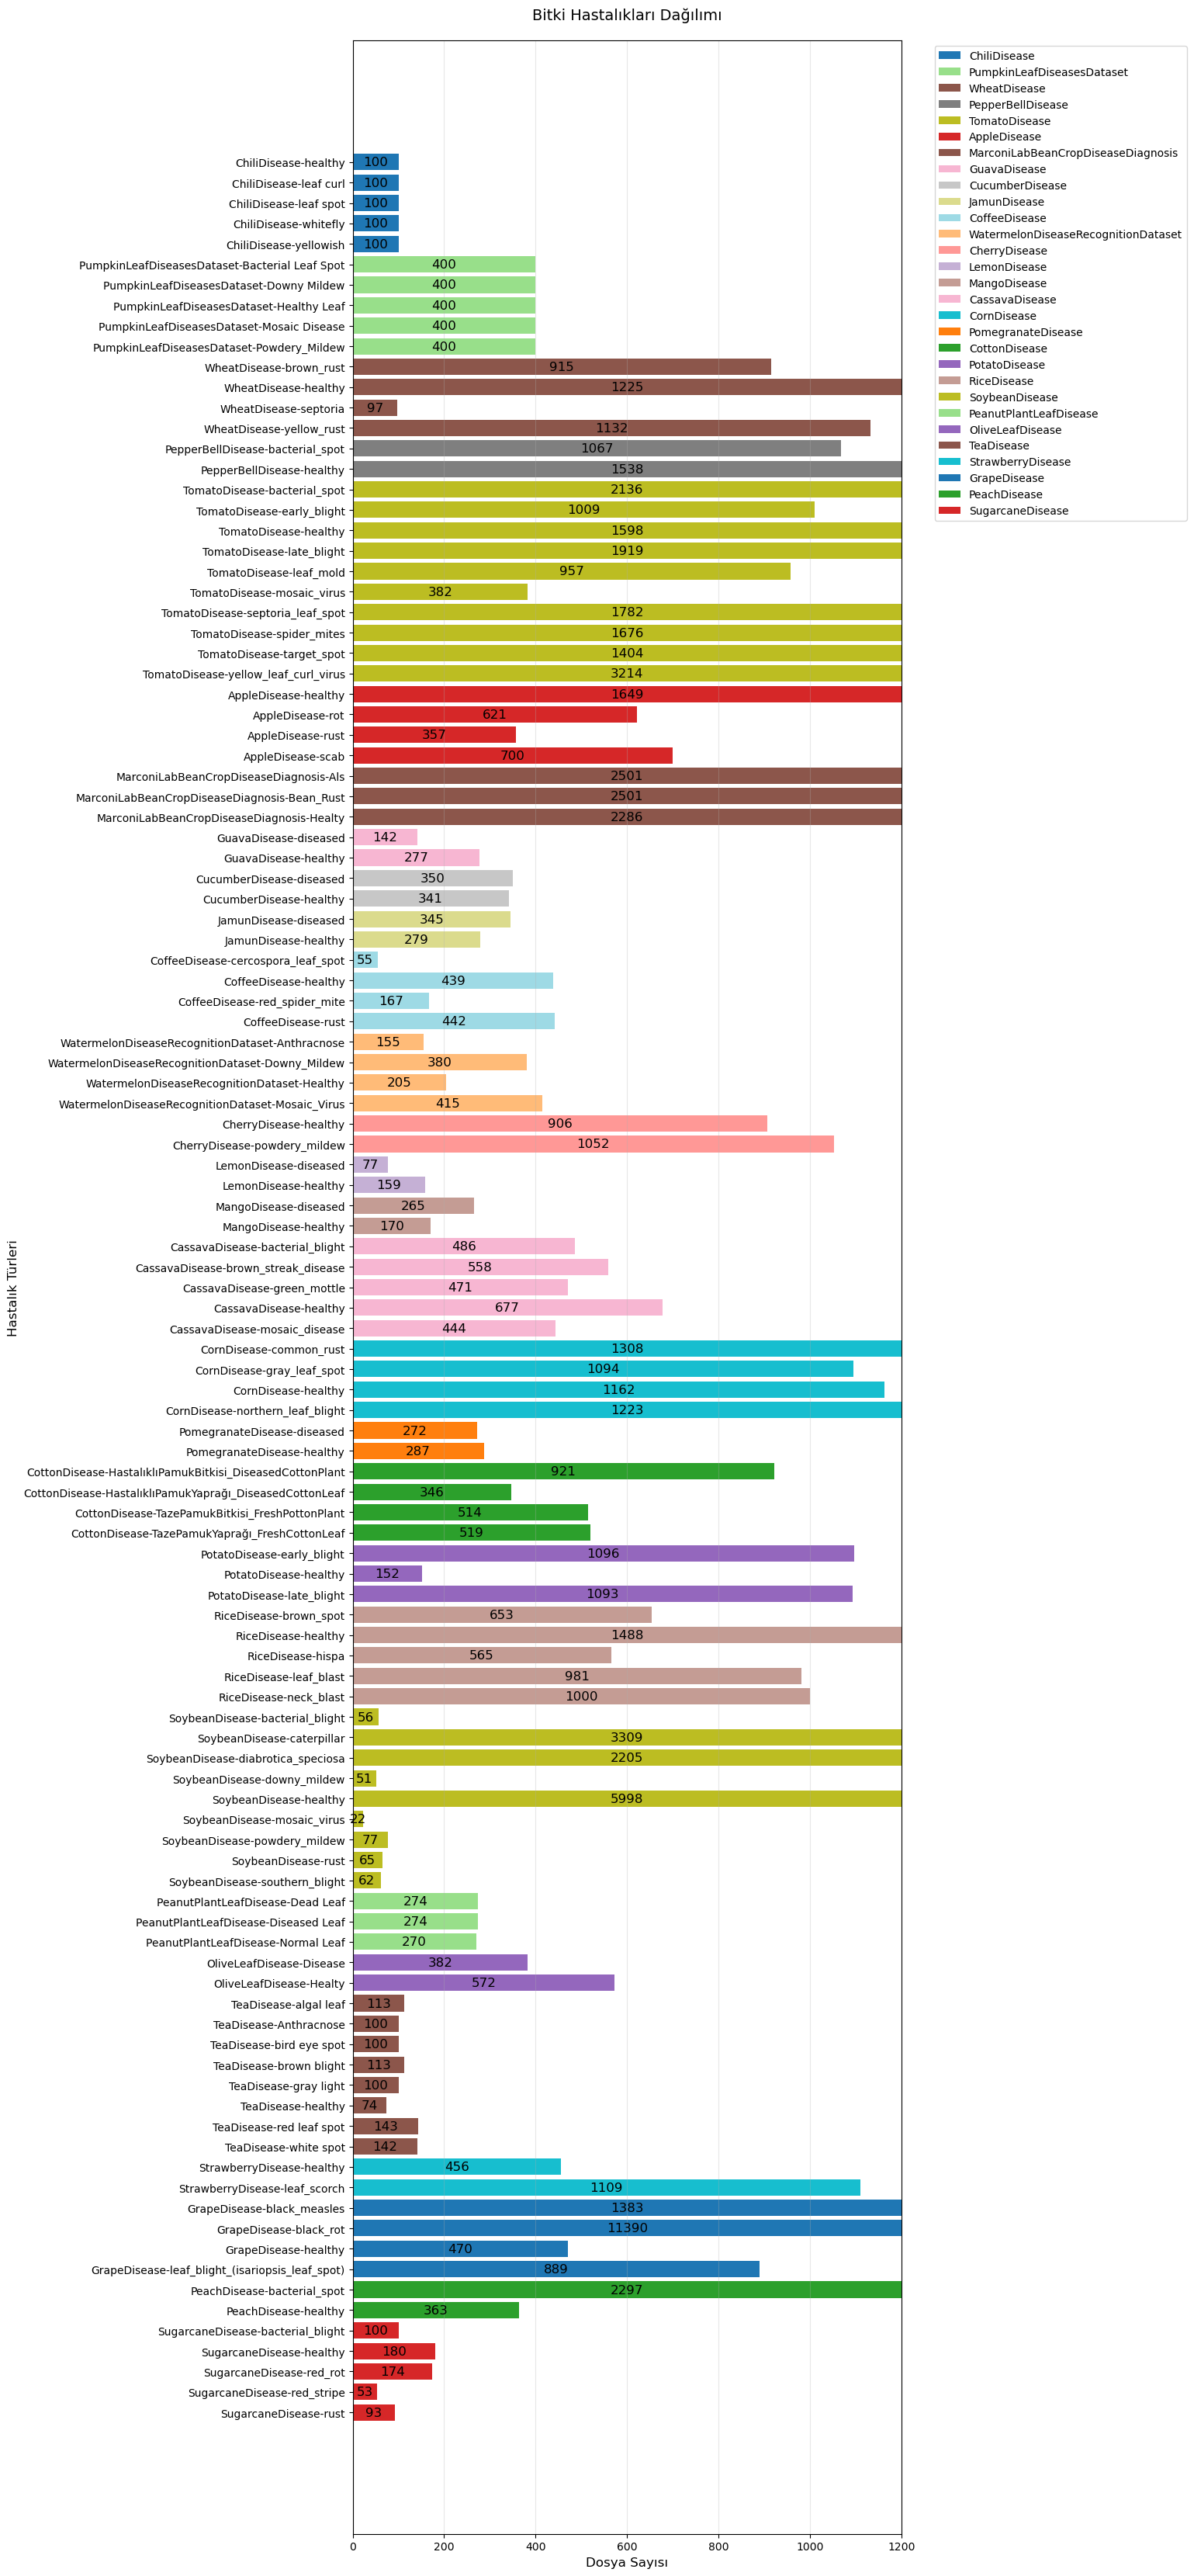

In [5]:
# Grafik boyutunu ayarla (dinamik yükseklik)
plt.figure(figsize=(12, len(bar_etiketleri) * 0.3))

# Bar plot'u çiz
bars = plt.barh(bar_etiketleri, bar_verileri, color=renkler)

# Bar içine sayıları yazdırma (orta kısma)
plt.bar_label(bars, labels=bar_verileri, label_type='center', color='black', fontsize=12)

# Eksen ayarları
plt.xlim(0, 1200)
plt.xlabel("Dosya Sayısı", fontsize=12)
plt.ylabel("Hastalık Türleri", fontsize=12)
plt.title("Bitki Hastalıkları Dağılımı", fontsize=14, pad=20)

# Grid ve diğer ayarlar
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  # En yüksek değer en üstte görünsün
plt.tight_layout()

# Lejant oluşturma (bitki türleri için)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) 
                   for label, color in bitki_renkleri.items()]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("bitki_hastaliklari_dagilimi.svg", format="svg", dpi=300, bbox_inches='tight')
plt.savefig("bitki_hastaliklari_dagilimi.png", dpi=300, bbox_inches='tight')

plt.show()